In [1]:
'''
BE VERY CAREFUL. Option for including only interior marsh. Leave lat and lon out of predictors. Seems to work well.
'''

'\nBE VERY CAREFUL. Option for including only interior marsh. Leave lat and lon out of predictors. Seems to work well.\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import os
import seaborn as sns
import statsmodels.formula.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.model_selection import train_test_split
import sklearn
from math import sqrt
import glob

In [3]:
import ee
import geemap
service_account = ' boba-account@boba-430314.iam.gserviceaccount.com '
credentials = ee.ServiceAccountCredentials(service_account,'C:/Users/arj26323/OneDrive - University of Georgia/Documents/GEE AUTH/boba-430314-a19be859bfca.json')

ee.Initialize(credentials)

print(geemap.__version__)

0.34.1


In [4]:
#ADD: PDSI and Evaporation potential!

'''ADD: LOG and z-score for river discharge! see https://link.springer.com/article/10.1007/s10021-013-9732-6

TALKS ABOUT SITE 8 IN RESULTS. GET SITE BACK IN THERE

ADD SLOPE TOO!!

'''

'ADD: LOG and z-score for river discharge! see https://link.springer.com/article/10.1007/s10021-013-9732-6\n\nTALKS ABOUT SITE 8 IN RESULTS. GET SITE BACK IN THERE\n\nADD SLOPE TOO!!\n\n'

In [5]:
##Remote sensing data:
import glob

path = r'C:/Users/arj26323//Documents/All extract/GA'

all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df1 = pd.read_csv(filename, index_col=None, header=0)
    li.append(df1)

df1 = pd.concat(li, axis=0, ignore_index=True)

df1

display(df1)

# for col in df1.columns:
#     print(col)

,Date,Latitude,Longitude,Plant_Biomass,Plot,QA_PIXEL,QA_RADSAT,Quadrat_Area,SR_ATMOS_OPACITY,SR_B1,...,Site,Species_Code,Year,Zone,date,flats,index,SR_B6,SR_QA_AEROSOL,ST_B10
0,2000-10-18,31.518920,-81.228956,710.396,1,5440,0,0.25,341.0,0.055585,...,3,A1,2000,1,1984-05-14,0.427200,25,NaN,NaN,NaN
1,2001-10-16,31.518920,-81.228956,37.072,1,5440,0,0.25,341.0,0.055585,...,3,A1,2001,1,1984-05-14,0.427200,26,NaN,NaN,NaN
2,2002-10-20,31.518920,-81.228956,1671.384,1,5440,0,0.25,341.0,0.055585,...,3,A1,2002,1,1984-05-14,0.427200,27,NaN,NaN,NaN
3,2004-10-24,31.518920,-81.228956,326.600,1,5440,0,0.25,341.0,0.055585,...,3,A1,2004,1,1984-05-14,0.427200,28,NaN,NaN,NaN
4,2005-10-22,31.518920,-81.228956,939.480,1,5440,0,0.25,341.0,0.055585,...,3,A1,2005,1,1984-05-14,0.427200,29,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975288,2017-10-18,31.436007,-81.340043,576.920,2,21824,0,0.25,NaN,0.007680,...,5,A1,2017,1,2024-12-21,0.003804,447,0.088447,100.0,286.113872
1975289,2018-10-19,31.436007,-81.340043,984.016,2,21824,0,0.25,NaN,0.007680,...,5,A1,2018,1,2024-12-21,0.003804,448,0.088447,100.0,286.113872
1975290,2019-10-11,31.436007,-81.340043,1232.132,2,21824,0,0.25,NaN,0.007680,...,5,A1,2019,1,2024-12-21,0.003804,449,0.088447,100.0,286.113872
1975291,2020-10-12,31.436007,-81.340043,1191.840,2,21824,0,0.25,NaN,0.007680,...,5,A1,2020,1,2024-12-21,0.003804,450,0.088447,100.0,286.113872


In [6]:
##ONLY SPARTINA
# df1 = df1[df1['Species_Code'] == 'A1']

#ONLY MARSH INTERIOR
# df1 = df1[df1['Zone'] == 2]  ##BE VERY CAREFUL

In [7]:
#Specific site removal (rather than only marsh interior approach)

excluded_sites = [8, 9]

df1 = df1[~((df1['Zone'] == 1) & (df1['Site'].isin(excluded_sites)))]

df1

,Date,Latitude,Longitude,Plant_Biomass,Plot,QA_PIXEL,QA_RADSAT,Quadrat_Area,SR_ATMOS_OPACITY,SR_B1,...,Site,Species_Code,Year,Zone,date,flats,index,SR_B6,SR_QA_AEROSOL,ST_B10
0,2000-10-18,31.518920,-81.228956,710.396,1,5440,0,0.25,341.0,0.055585,...,3,A1,2000,1,1984-05-14,0.427200,25,NaN,NaN,NaN
1,2001-10-16,31.518920,-81.228956,37.072,1,5440,0,0.25,341.0,0.055585,...,3,A1,2001,1,1984-05-14,0.427200,26,NaN,NaN,NaN
2,2002-10-20,31.518920,-81.228956,1671.384,1,5440,0,0.25,341.0,0.055585,...,3,A1,2002,1,1984-05-14,0.427200,27,NaN,NaN,NaN
3,2004-10-24,31.518920,-81.228956,326.600,1,5440,0,0.25,341.0,0.055585,...,3,A1,2004,1,1984-05-14,0.427200,28,NaN,NaN,NaN
4,2005-10-22,31.518920,-81.228956,939.480,1,5440,0,0.25,341.0,0.055585,...,3,A1,2005,1,1984-05-14,0.427200,29,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975288,2017-10-18,31.436007,-81.340043,576.920,2,21824,0,0.25,NaN,0.007680,...,5,A1,2017,1,2024-12-21,0.003804,447,0.088447,100.0,286.113872
1975289,2018-10-19,31.436007,-81.340043,984.016,2,21824,0,0.25,NaN,0.007680,...,5,A1,2018,1,2024-12-21,0.003804,448,0.088447,100.0,286.113872
1975290,2019-10-11,31.436007,-81.340043,1232.132,2,21824,0,0.25,NaN,0.007680,...,5,A1,2019,1,2024-12-21,0.003804,449,0.088447,100.0,286.113872
1975291,2020-10-12,31.436007,-81.340043,1191.840,2,21824,0,0.25,NaN,0.007680,...,5,A1,2020,1,2024-12-21,0.003804,450,0.088447,100.0,286.113872


In [8]:
#Distinguishing between sensors, in order to make indices: USE PRESENCE OF DATA IN B10

df1['Sensor'] = np.where(df1['ST_B10'].isna(),'Landsat 5/7', 'Landsat 8/9')

#Datetime and year for LS data and biomass sampling data
df1['LS_datetime'] = pd.to_datetime(df1['date'], format='%Y-%m-%d')
df1['LS_year'] = df1['LS_datetime'].dt.strftime('%Y')

df1['Sampling_datetime'] = pd.to_datetime(df1['Date'])
df1['Sampling_year'] = df1['Sampling_datetime'].dt.strftime('%Y')

df1['Month'] = df1['LS_datetime'].dt.month #IMPORTANT FOR VARIABLES! MUST BE SAMPLING LS TIME

# df1[df1['LS_Sensor'] == 'Landsat 8/9'] #600000 5/7, 1000000 8/9

# df1['Month']

In [9]:
#Renaming bands, based on Landsat sensors

df1['Blue_band'] = np.where(df1['Sensor'] == 'Landsat 8/9', df1['SR_B2'], df1['SR_B1'])
df1['Green_band'] = np.where(df1['Sensor'] == 'Landsat 8/9', df1['SR_B3'], df1['SR_B2'])
df1['Red_band'] = np.where(df1['Sensor'] == 'Landsat 8/9', df1['SR_B4'], df1['SR_B3'])
df1['NIR_band'] = np.where(df1['Sensor'] == 'Landsat 8/9', df1['SR_B5'], df1['SR_B4'])
df1['SWIR1_band'] = np.where(df1['Sensor'] == 'Landsat 8/9', df1['SR_B6'], df1['SR_B5'])
df1['SWIR2_band'] = np.where(df1['Sensor'] == 'Landsat 8/9', df1['SR_B7'], df1['SR_B7'])

#THERMAL BANDS
df1['thermal_band_kelvin'] = np.where(df1['Sensor'] == 'Landsat 8/9', df1['ST_B10'], df1['ST_B6'])
df1['thermal_band_celsius'] = df1['thermal_band_kelvin'] - 273.15

##Indices (make sure calculations are accurate):
df1['savi'] = ((df1['NIR_band']-df1['Red_band'])*1.5)/(df1['NIR_band']+df1['Red_band']+0.5)
df1['wdrvi5'] = (0.5*df1['NIR_band']-df1['Red_band'])/(0.5*df1['NIR_band']+df1['Red_band'])
df1['nd_r_g'] = (df1['Red_band']-df1['Green_band'])/(df1['Red_band']+df1['Green_band'])
df1['nd_g_b'] = (df1['Green_band']-df1['Blue_band'])/(df1['Green_band']+df1['Blue_band'])
df1['nd_swir2_nir'] = (df1['SWIR2_band']-df1['NIR_band'])/(df1['SWIR2_band']+df1['NIR_band'])
df1['nd_swir2_r'] = (df1['SWIR2_band']-df1['Red_band'])/(df1['SWIR2_band']+df1['Red_band'])
df1['evi'] =((df1['NIR_band']-df1['Red_band'])*2.5)/(df1['NIR_band']+6*df1['Red_band']+7.5*df1['Blue_band']+1)
df1['ndvi'] = ((df1['NIR_band']-df1['Red_band']))/(df1['NIR_band']+df1['Red_band'])

In [10]:
# df1['date'] is the Landsat extraction date, ranging from 1985-2024! df1['Date'] is the sampling date for each site! (2000-2?)
#df1['Year'] is the sampling year as well! Starting in 2000
# # df1['Year']
# for col in df1.columns:
#     print(col)

# df1['thermal_band_celcius']

In [11]:
#Lat/lon paired with site

pairsite = df1[['Latitude', 'Longitude', 'Site']].drop_duplicates()
# pairsite

# conflicts = pairsite.groupby(['Latitude', 'Longitude'])['Site'].nunique()
# conflicts[conflicts > 1]

In [12]:
##ADDITIONAL GROUP BY LS YEAR

def seasonal_band_stats(df, start_month, end_month, bands, stat_name='mean'):
    # Filter by month range
    df_season = df[(df['Month'] >= start_month) & (df['Month'] <= end_month)]
    
    # Filter to only those rows where LS_year matches Sampling_year
    df_season = df_season[df_season['LS_year'] == df_season['Sampling_year']]

    # Grouping by location and both year types
    group_cols = ['Latitude', 'Longitude', 'Sampling_year', 'LS_year']  ##ADD SITE???????
    
    # Choose aggregation function
    if stat_name == 'mean':
        agg_func = 'mean'
    elif stat_name == 'min':
        agg_func = 'min'
    elif stat_name == 'max':
        agg_func = 'max'
    elif stat_name == 'median':
        agg_func = 'median'
    elif stat_name == 'sum':
        agg_func = 'sum'    
    else:
        raise ValueError("stat_name must be 'mean', 'min', 'max', 'sum,' or 'median'")
    
    # Perform aggregation
    df_grouped = df_season.groupby(group_cols)[bands].agg(agg_func).reset_index()
    
    # Rename columns to reflect the operation and month window
    suffix = f'{stat_name}_{start_month:02d}_{end_month:02d}'
    df_grouped = df_grouped.rename(columns={col: f'{col}_{suffix}' for col in bands})
    
    return df_grouped

In [13]:
##Flooding dataset                                              )

df1_flooding = df1.groupby(['Latitude', 'Longitude', 'Plant_Biomass','Sampling_year']).apply(
    lambda g: (g['flats'] >= 0.2).mean()).reset_index(name='Percent_flooding'
                                                     )
##DO NOT GROUP FLOODING PERCENT BY LS_YEAR - you want the total percent flooding over the entire time period. ADD AT END?

df1_flooding

,Latitude,Longitude,Plant_Biomass,Sampling_year,Percent_flooding
0,31.308449,-81.415129,71.520,2023,0.014085
1,31.308449,-81.415129,140.192,2018,0.014085
2,31.308449,-81.415129,170.976,2016,0.014085
3,31.308449,-81.415129,307.200,2022,0.014085
4,31.308449,-81.415129,435.200,2021,0.014085
...,...,...,...,...,...
3528,31.539505,-81.421937,578.496,2015,0.011594
3529,31.539505,-81.421937,602.000,2010,0.011594
3530,31.539505,-81.421937,843.424,2008,0.011594
3531,31.539505,-81.421937,883.136,2009,0.011594


In [14]:
##FLATS+ FILTERING!!
df1_filtered = df1[df1['flats'] < 0.2]

In [15]:
##Calculating variables of interest

bands_of_interest = ['ndvi', 'evi', 'nd_swir2_r', 'nd_swir2_nir', 'nd_g_b', 'nd_r_g', 'wdrvi5', 'savi', 'SWIR2_band', \
                     'SWIR1_band', 'NIR_band', 'Red_band', 'Green_band', 'Blue_band', 'flats', 'thermal_band_celsius']

##AUGOCT - PEAK
# Calculate average
mean_augoct = seasonal_band_stats(df1_filtered, 8, 10, bands_of_interest, stat_name='mean')
# Calculate max
max_augoct = seasonal_band_stats(df1_filtered, 8, 10, bands_of_interest, stat_name='max')
# Calculate min
min_augoct = seasonal_band_stats(df1_filtered, 8, 10, bands_of_interest, stat_name='min')
# Calculate median
med_augoct = seasonal_band_stats(df1_filtered, 8, 10, bands_of_interest, stat_name='median')
# Calculate SUM
sum_augoct = seasonal_band_stats(df1_filtered, 8, 10, bands_of_interest, stat_name='sum')

##MAYOCT - GROWING
# Calculate average
mean_mayoct = seasonal_band_stats(df1_filtered, 5, 10, bands_of_interest, stat_name='mean')
# Calculate max
max_mayoct = seasonal_band_stats(df1_filtered, 5, 10, bands_of_interest, stat_name='max')
# Calculate min
min_mayoct = seasonal_band_stats(df1_filtered, 5, 10, bands_of_interest, stat_name='min')
# Calculate median
med_mayoct = seasonal_band_stats(df1_filtered, 5, 10, bands_of_interest, stat_name='median')
# Calculate SUM
sum_mayoct = seasonal_band_stats(df1_filtered, 5, 10, bands_of_interest, stat_name='sum')

##MARMAY - EARLY
# Calculate average
mean_marmay = seasonal_band_stats(df1_filtered, 3, 5, bands_of_interest, stat_name='mean')
# Calculate max
max_marmay = seasonal_band_stats(df1_filtered, 3, 5, bands_of_interest, stat_name='max')
# Calculate min
min_marmay = seasonal_band_stats(df1_filtered, 3, 5, bands_of_interest, stat_name='min')
# Calculate median
med_marmay = seasonal_band_stats(df1_filtered, 3, 5, bands_of_interest, stat_name='median')
# Calculate SUM
sum_marmay = seasonal_band_stats(df1_filtered, 3, 5, bands_of_interest, stat_name='sum')

##JANDEC - YEAR
# Calculate average
mean_year = seasonal_band_stats(df1_filtered, 1, 12, bands_of_interest, stat_name='mean')
# Calculate max
max_year = seasonal_band_stats(df1_filtered, 1, 12, bands_of_interest, stat_name='max')
# Calculate min
min_year = seasonal_band_stats(df1_filtered, 1, 12, bands_of_interest, stat_name='min')
# Calculate median
med_year = seasonal_band_stats(df1_filtered, 1, 12, bands_of_interest, stat_name='median')
# Calculate SUM
sum_year = seasonal_band_stats(df1_filtered, 1, 12, bands_of_interest, stat_name='sum')

In [16]:
df_final = mean_augoct
df_final = df_final.merge(max_augoct, on=['Latitude', 'Longitude', 'Sampling_year', 'LS_year'], how='left')
df_final = df_final.merge(min_augoct, on=['Latitude', 'Longitude', 'Sampling_year', 'LS_year'], how='left')
df_final = df_final.merge(med_augoct, on=['Latitude', 'Longitude', 'Sampling_year', 'LS_year'], how='left')
df_final = df_final.merge(sum_augoct, on=['Latitude', 'Longitude', 'Sampling_year', 'LS_year'], how='left')

df_final = df_final.merge(mean_mayoct, on=['Latitude', 'Longitude', 'Sampling_year', 'LS_year'], how='left')
df_final = df_final.merge(max_mayoct, on=['Latitude', 'Longitude', 'Sampling_year', 'LS_year'], how='left')
df_final = df_final.merge(min_mayoct, on=['Latitude', 'Longitude', 'Sampling_year', 'LS_year'], how='left')
df_final = df_final.merge(med_mayoct, on=['Latitude', 'Longitude', 'Sampling_year', 'LS_year'], how='left')
df_final = df_final.merge(sum_mayoct, on=['Latitude', 'Longitude', 'Sampling_year', 'LS_year'], how='left')

df_final = df_final.merge(mean_marmay, on=['Latitude', 'Longitude', 'Sampling_year', 'LS_year'], how='left')
df_final = df_final.merge(max_marmay, on=['Latitude', 'Longitude', 'Sampling_year', 'LS_year'], how='left')
df_final = df_final.merge(min_marmay, on=['Latitude', 'Longitude', 'Sampling_year', 'LS_year'], how='left')
df_final = df_final.merge(med_marmay, on=['Latitude', 'Longitude', 'Sampling_year', 'LS_year'], how='left')
df_final = df_final.merge(sum_marmay, on=['Latitude', 'Longitude', 'Sampling_year', 'LS_year'], how='left')

df_final = df_final.merge(mean_year, on=['Latitude', 'Longitude', 'Sampling_year', 'LS_year'], how='left')
df_final = df_final.merge(max_year, on=['Latitude', 'Longitude', 'Sampling_year', 'LS_year'], how='left')
df_final = df_final.merge(min_year, on=['Latitude', 'Longitude', 'Sampling_year', 'LS_year'], how='left')
df_final = df_final.merge(med_year, on=['Latitude', 'Longitude', 'Sampling_year', 'LS_year'], how='left')
df_final = df_final.merge(sum_year, on=['Latitude', 'Longitude', 'Sampling_year', 'LS_year'], how='left')

#Add df1_flooding
df_final = df_final.merge(df1_flooding, on=['Latitude', 'Longitude', 'Sampling_year'], how='left')

#Add elevation
elev_10 = pd.read_csv('C:/Users/arj26323/Documents/All extract/Elevation/elev.csv')
elev_10['Sampling_datetime'] = pd.to_datetime(elev_10['Date'])
elev_10['Sampling_year'] = elev_10['Sampling_datetime'].dt.strftime('%Y')
elev_10 = elev_10[['Sampling_year', 'Latitude', 'Longitude', 'elevation']]

#Add slope
slope_10 = pd.read_csv('C:/Users/arj26323/Documents/All extract/Elevation/slope.csv')
slope_10['Sampling_datetime'] = pd.to_datetime(slope_10['Date'])
slope_10['Sampling_year'] = slope_10['Sampling_datetime'].dt.strftime('%Y')
slope_10 = slope_10[['Sampling_year', 'Latitude', 'Longitude', 'slope']]

#Add DSM
dsm = pd.read_csv('C:/Users/arj26323/Documents/All extract/Elevation/dsm.csv')
dsm['Sampling_datetime'] = pd.to_datetime(dsm['Date'])
dsm['Sampling_year'] = dsm['Sampling_datetime'].dt.strftime('%Y')
dsm = dsm[['Sampling_year', 'Latitude', 'Longitude', 'DSM']]

df_final = df_final.merge(elev_10, on=['Latitude', 'Longitude', 'Sampling_year'], how='left')
df_final = df_final.merge(dsm, on=['Latitude', 'Longitude', 'Sampling_year'], how='left')
df_final = df_final.merge(slope_10, on=['Latitude', 'Longitude', 'Sampling_year'], how='left')

df_final['DSM'] = df_final.groupby(['Latitude', 'Longitude'])['DSM'].transform('first') ##Populating empty DSM vals

#Adding site information back
df_final = df_final.merge(pairsite, on=['Latitude', 'Longitude'], how='left')

#Add USGS river discharge data (BELOW)

df_final #elev merge added 6 extra rows...

,Latitude,Longitude,Sampling_year,LS_year,ndvi_mean_08_10,evi_mean_08_10,nd_swir2_r_mean_08_10,nd_swir2_nir_mean_08_10,nd_g_b_mean_08_10,nd_r_g_mean_08_10,...,Green_band_sum_01_12,Blue_band_sum_01_12,flats_sum_01_12,thermal_band_celsius_sum_01_12,Plant_Biomass,Percent_flooding,elevation,DSM,slope,Site
0,31.308449,-81.415129,2013,2013,0.608544,0.185087,0.262307,-0.411777,0.188730,0.020280,...,0.582122,0.407772,0.013652,401.087648,440.816,0.014085,1.179146,NaN,0.693467,8
1,31.308449,-81.415129,2015,2015,0.502339,0.148550,0.240085,-0.298153,0.132298,0.062364,...,1.479897,1.100755,0.050575,791.568502,468.640,0.014085,1.179146,NaN,0.693467,8
2,31.308449,-81.415129,2016,2016,0.548571,0.179854,0.294428,-0.302436,0.142160,0.049064,...,1.580947,1.177742,0.053336,946.218879,170.976,0.014085,1.179146,NaN,0.693467,8
3,31.308449,-81.415129,2018,2018,0.497044,0.161636,0.261019,-0.271003,0.122543,0.050631,...,1.199812,0.901217,0.021759,554.608754,140.192,0.014085,1.179146,NaN,0.693467,8
4,31.308449,-81.415129,2021,2021,0.496204,0.159708,0.267223,-0.263843,0.129631,0.059329,...,1.761272,1.351027,0.042712,828.986952,435.200,0.014085,NaN,NaN,0.693467,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,31.539505,-81.421937,2018,2018,0.539582,0.148651,0.293553,-0.292413,0.173896,0.038968,...,0.665092,0.454635,0.194081,459.546751,434.768,0.011594,1.087664,NaN,0.308225,1
3059,31.539505,-81.421937,2019,2019,0.453920,0.121159,0.268477,-0.211386,0.140268,0.030576,...,0.830662,0.593310,0.037731,465.214506,324.176,0.011594,1.087664,NaN,0.308225,1
3060,31.539505,-81.421937,2020,2020,0.572171,0.170051,0.309778,-0.318770,0.322373,0.006610,...,0.864470,0.580257,0.023404,531.869344,340.144,0.011594,NaN,NaN,0.308225,1
3061,31.539505,-81.421937,2021,2021,0.566227,0.167103,0.236192,-0.380722,0.192631,0.046198,...,0.991632,0.670845,0.051100,617.593994,246.176,0.011594,NaN,NaN,0.308225,1


In [17]:
# ##Add USGS river discharge data

# dr_file_path = 'C:/Users/arj26323/Documents/Data/Hydrology/Discharge/Doctortown84_25.txt'

# # Step 1: Count lines starting with '#'
# def count_metadata_lines(path):
#     with open(path, 'r') as f:
#         return sum(1 for line in f if line.startswith('#'))

# skip_rows = count_metadata_lines(dr_file_path)

# # Step 2: Define column names (based on observed file structure)
# column_names = ['agency_cd', 'site_no', 'datetime', 'discharge_cfs', 'qualifier']

# # Step 3: Load data
# dr_df = pd.read_csv(
#     dr_file_path,
#     sep='\t',
#     skiprows=skip_rows,
#     names=column_names,
#     parse_dates=['datetime'],
#     comment='#',
#     na_values=['', 'NaN', '-999999']
# )

# # Step 4: Clean up (remove rows with missing or invalid discharge values)
# dr_df = dr_df.dropna(subset=['discharge_cfs'])

# # Step 5: Convert discharge to numeric (some entries might be strings)
# dr_df['discharge_cfs'] = pd.to_numeric(dr_df['discharge_cfs'], errors='coerce')
# # dr_df = dr_df.dropna(subset=['discharge_cfs'])

# # Step 6: Extract year and calculate annual average

# dr_df = dr_df[2:]

# dr_df['pd_datetime'] = pd.to_datetime(dr_df['datetime'], format='%Y-%m-%d')

# dr_df['Sampling_year'] = dr_df['pd_datetime'].dt.year


# ##Apr. - Sep. discharge
# dr_df['month'] = dr_df['pd_datetime'].dt.month

# # APR-SEP average (same year)
# apr_sep = dr_df[dr_df['month'].between(4, 9)]
# apr_sep_avg = apr_sep.groupby('Sampling_year')['discharge_cfs'].mean().reset_index()
# apr_sep_avg.rename(columns={'discharge_cfs': 'apr_sep_avg_cfs'}, inplace=True)

# # NOV-MAR average (spans two years — assign to year of November)
# # Create a helper column: 'season_year' = year of Nov–Mar block (based on November's year)
# def assign_season_year(row):
#     if row['month'] >= 11:
#         return row['pd_datetime'].year  # Nov, Dec
#     elif row['month'] <= 3:
#         return row['pd_datetime'].year - 1  # Jan, Feb, Mar
#     else:
#         return None  # We will filter this out

# nov_mar = dr_df[dr_df['month'].isin([11, 12, 1, 2, 3])].copy()
# nov_mar['season_year'] = nov_mar.apply(assign_season_year, axis=1)
# nov_mar_avg = nov_mar.groupby('season_year')['discharge_cfs'].mean().reset_index()
# nov_mar_avg.rename(columns={'discharge_cfs': 'nov_mar_avg_cfs', 'season_year': 'Sampling_year'}, inplace=True)

# annual_avg = dr_df.groupby('Sampling_year')['discharge_cfs'].mean().reset_index()
# annual_avg.rename(columns={'discharge_cfs': 'annual_discharge_cfs'}, inplace=True)

# # Merge seasonal averages into annual_avg
# annual_avg = annual_avg.merge(apr_sep_avg, on='Sampling_year', how='left')
# annual_avg = annual_avg.merge(nov_mar_avg, on='Sampling_year', how='left')

# from scipy import stats
# annual_avg['z_discharge'] = stats.zscore(annual_avg['annual_discharge_cfs'])
# annual_avg['z_aprsep'] = stats.zscore(annual_avg['apr_sep_avg_cfs'])

# #Finally, merge with df_final

# df_final['Sampling_year'] = df_final['Sampling_year'].astype(int)
# annual_avg['Sampling_year'] = annual_avg['Sampling_year'].astype(int)


# df_final = df_final.merge(annual_avg, on=['Sampling_year'], how='left')
# df_final

In [18]:
# for col in df_final.columns:
#     print(col)

max(df_final['Plant_Biomass'])

# df_final['nov_mar_avg_cfs'].sum()


7189.432

C:\Users\arj26323\.conda\envs\geeml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arj26323\.conda\envs\geeml\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='Aboveground biomass (g $m^{-2}$)', ylabel='Frequency(count)'>

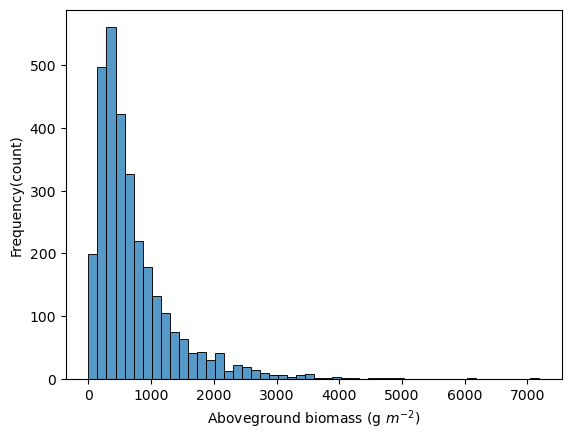

In [19]:
# df_final['Plant_Biomass'].hist(bins = 50) ##Note: Greatest biomass plots are not S. alterniflora - will be removed?

df_final['Plant_Biomass'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

#Hist plot
import seaborn as sn

g = sn.histplot(data = df_final, x = 'Plant_Biomass', bins = 50)
g.set(xlabel='Aboveground biomass (g $m^{-2}$)', ylabel='Frequency(count)')
g

# df_final

In [20]:
##Daymet - adding from previous extraction efforts
# dmdata = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/df_testxyzgridmet.csv') #OUTDATED
dmdata = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/daymetgridmet.csv')

# for col in dmdata.columns:
#     print(col)
    
# dmdata['Date'] = dmdata['Date_x']
# dmdata['Latitude'] = dmdata['Latitude_x']
# dmdata['Longitude'] = dmdata['Longitude_x']

dmx = dmdata[['Latitude','Longitude','Plant_Biomass','dayl','prcp','srad','swe','tmax','tmin','vp',
#               'dayl_rolling',
#               'prcp_rolling','srad_rolling','swe_rolling','tmax_rolling','tmin_rolling',
#               'vp_rolling',
              'dayl_daymMarMay','prcp_daymMarMay','srad_daymMarMay','swe_daymMarMay','tmax_daymMarMay',
              'tmin_daymMarMay','vp_daymMarMay','dayl_daymMayOct','prcp_daymMayOct','srad_daymMayOct','swe_daymMayOct',
              'tmax_daymMayOct','tmin_daymMayOct','vp_daymMayOct','dayl_Max','prcp_Max','srad_Max','swe_Max','tmax_Max',
              'tmin_Max','vp_Max','dayl_Min','prcp_Min','srad_Min','swe_Min','tmax_Min','tmin_Min','vp_Min','dayl_peak',
              'prcp_peak','srad_peak','swe_peak','tmax_peak','tmin_peak','vp_peak','eddi14d','eddi180d','eddi1y','eddi270d',
              'eddi2y','eddi30d','eddi5y','eddi90d','pdsi','spei14d','spei180d','spei1y','spei270d','spei2y','spei30d','spei5y',
              'spei90d','spi14d','spi180d','spi1y','spi270d','spi2y','spi30d','spi5y','spi90d','z','pdsi_MarMay',
              'spei180d_MarMay','spei1y_MarMay','spei30d_MarMay','spei5y_MarMay','spei90d_MarMay','pdsi_MayOct',
              'spei180d_MayOct','spei1y_MayOct','spei30d_MayOct','spei5y_MayOct','spei90d_MayOct','pdsi_Max','spei180d_Max',
              'spei1y_Max','spei30d_Max','spei5y_Max','spei90d_Max','pdsi_Min','spei180d_Min','spei1y_Min','spei30d_Min',
              'spei5y_Min','spei90d_Min','pdsi_gridmet','spei180d_gridmet','spei1y_gridmet','spei30d_gridmet','spei5y_gridmet',
              'spei90d_gridmet'
             ]]
dmx

df0 = df_final.copy()

dfdm = df0.merge(dmx, on = ['Latitude', 'Longitude', 'Plant_Biomass'], how='left')

# dfdm

In [21]:
##Modeling
df = df_final.copy()

##ADDING DAYMET
df = df_final.copy().merge(dmx, on = ['Latitude', 'Longitude', 'Plant_Biomass'], how='left') 
df['Yr'] = pd.to_datetime(df['Sampling_year'])

# ##LAGGING
# df = df.sort_values(by=['Latitude', 'Longitude', 'Sampling_year'])
# exclude_cols = ['Plant_Biomass', 'Sampling_year', 'Latitude', 'Longitude', 'elevation', 'Percent_flooding', 'LS_year', 'Yr']
# cols_to_lag = [col for col in df.columns if col not in exclude_cols]

# for var in cols_to_lag:
#     df[f'{var}_lag1'] = df.groupby(['Latitude', 'Longitude'])[var].shift(1)
    
# for var in cols_to_lag:
#     df[f'{var}_lag2'] = df.groupby(['Latitude', 'Longitude'])[var].shift(2)

In [22]:
##Removing creek points that may have eroded over time (myproject2 in ArcGIS has some of the trend rasters and point locations)

cp = pd.read_csv('C:/Users/arj26323/OneDrive - University of Georgia/Documents/Data/Biomass datasets/Sapelo/creekpoints.csv')
cp2 = cp.drop_duplicates(subset=['Longitude', 'Latitude'])
cp3 = cp2[['Latitude', 'Longitude']]

df_cleaned = df.merge(cp3, on=['Latitude', 'Longitude'], how='left', indicator=True)
df_cleaned2 = df_cleaned[df_cleaned['_merge'] == 'left_only'].drop(columns=['_merge'])

In [23]:
xre = df[df['Site'] == 10]
print(xre['Plant_Biomass'].mean())
print(xre['Plant_Biomass'].median())
xre['Plant_Biomass']

575.1747016706444
518.584


1682     617.936
1683     559.828
1684     390.444
1685    1310.576
1686     928.708
          ...   
2096     573.168
2097     583.120
2098     682.704
2099     806.768
2100     941.664
Name: Plant_Biomass, Length: 419, dtype: float64

In [24]:
    
##ROUNDING LATITUDE AND LONGITUDE    
df['lat_r'] = df['Latitude'].round(6)
df['lon_r'] = df['Longitude'].round(6)


df['elevation'] = (
    df
    .groupby(['lat_r', 'lon_r'])['elevation']
    .transform('first')
)

df.groupby(['lat_r', 'lon_r'])['elevation'].nunique().value_counts()


# with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):
#     display(df[['Latitude','Longitude','elevation']])


elevation
1    188
Name: count, dtype: int64

In [25]:
##FILTERS

df0 = df.copy()
df0['Sampling_year'] = df0['Sampling_year'].astype(str) #Needed after discharge merge

# df0 = df_cleaned2.copy() ##if you want to remove creek points

df0 = df0[df0['Plant_Biomass'] < 5000] ##If you want to exclude outliers

# df0 = df0[df0['Sampling_year']<'2020-01-01'] ##Ignoring later data - use this for validation



'''REMOVE SITE if running all xargs'''


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

seed = 3

yargs=df0['Plant_Biomass'] 



##best features
xargs = df0[['evi_max_05_10',
             'slope',
             'elevation',
             'Percent_flooding',
             'srad_peak',
             'dayl_Max',
             'nd_swir2_nir_mean_05_10',
             'ndvi_mean_08_10',
             'nd_r_g_max_05_10',
             'spei14d'
            ]]


# ##below are xargs for best fit while leaving site 4 out
# xargs = df0[['evi_max_05_10','slope','elevation',
#              'evi_max_01_12',
#              'Percent_flooding',
#              'srad_peak',
#              'dayl_Max',
#              'dayl_Min',
#              'nd_swir2_nir_mean_05_10',
#              'evi_mean_01_12',
#              'ndvi_mean_08_10',
#              'nd_swir2_nir_median_05_10',
#              'nd_swir2_nir_mean_01_12',
#              'nd_r_g_max_05_10',
#              'wdrvi5_mean_08_10',
#              'spei14d',
#              'nd_swir2_nir_mean_08_10',
#              'evi_max_08_10',
#              'savi_max_05_10',
#              'ndvi_median_08_10']]

# xargs = df0[['nd_swir2_nir_median_05_10','elevation','nd_swir2_nir_mean_05_10', 'Percent_flooding','srad_peak','evi_mean_08_10',
#             'evi_max_05_10','nd_g_b_mean_01_12','evi_max_01_12','nd_swir2_nir_median_08_10','nd_swir2_r_min_05_10',
#             'evi_mean_01_12','nd_g_b_median_01_12','Blue_band_max_05_10','nd_swir2_nir_median_01_12','NIR_band_max_03_05_lag2',
#             'Red_band_max_05_10','dayl_daymMarMay','eddi2y','nd_swir2_nir_min_05_10','savi_mean_01_12',
#             'slope']]

# xargs=df0.loc[:, ~df0.columns.isin(['Latitude', 'Longitude', 'Sampling_year', 'LS_year', 'Plant_Biomass', 'Yr', 'Site',
#                                    'lon_r', 'lat_r'])]


# predictors / target
X = xargs
y = yargs
groups = df0['Site']

# --- Hold out Site 4 ---
test_mask = groups == 4

# X_test_final = X.loc[test_mask]
# y_test_final = y.loc[test_mask]

# X_remaining = X.loc[~test_mask]
# y_remaining = y.loc[~test_mask]


df_test = df0.loc[test_mask]
df_remaining = df0.loc[~test_mask]

features = xargs.columns

# Final test set
X_test_final = df_test[features]
y_test_final = df_test['Plant_Biomass']

# Remaining data (for CV + train/val)
X_remaining = df_remaining[features]
y_remaining = df_remaining['Plant_Biomass']
groups_remaining = df_remaining['Site']


In [26]:
X_train, X_val, y_train, y_val = train_test_split(
    X_remaining,
    y_remaining,
    test_size=0.2,
    random_state=seed
)

In [27]:
from sklearn.model_selection import GroupShuffleSplit

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=seed) ##Play around with n_splits??
train_idx, val_idx = next(gss.split(X_remaining, y_remaining, groups.loc[~test_mask]))

X_train = X_remaining.iloc[train_idx]
X_val   = X_remaining.iloc[val_idx]
y_train = y_remaining.iloc[train_idx]
y_val   = y_remaining.iloc[val_idx]

In [28]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('forest', RandomForestRegressor(
        n_estimators=500,
        min_samples_split=5,
        min_samples_leaf=4,
        max_depth=10,
        random_state=seed
    ))
])

pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('forest',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=4,
                                       min_samples_split=5, n_estimators=500,
                                       random_state=3))])

In [29]:
y_val_pred = pipe.predict(X_val)

print('Validation R²:', metrics.r2_score(y_val, y_val_pred))
print('Validation RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_val_pred)))


Validation R²: -0.29648667161621467
Validation RMSE: 444.318788014796


In [30]:
y_test_pred = pipe.predict(X_test_final)

print('TEST (Site 4) R²:', metrics.r2_score(y_test_final, y_test_pred))
print('TEST RMSE:', np.sqrt(metrics.mean_squared_error(y_test_final, y_test_pred)))
print('TEST NRMSE:',
      np.sqrt(metrics.mean_squared_error(y_test_final, y_test_pred)) /
      np.ptp(y_test_final))


TEST (Site 4) R²: 0.26819801174135005
TEST RMSE: 334.31848389385067
TEST NRMSE: 0.14188932136848384


In [31]:
from sklearn.model_selection import GroupKFold, cross_validate

gkf = GroupKFold(n_splits=9)

cv_results = cross_validate(
    pipe,
    X_remaining,
    y_remaining,
    cv=gkf,
    groups=groups.loc[~test_mask],
    scoring=('r2', 'neg_root_mean_squared_error'),
    return_train_score=True
)

cv_results

#Feature importance and average RMSE
xyz = pd.DataFrame(cv_results)
print('testing r2: ' + str(xyz['test_r2'].mean()))
print('testing rmse: ' + str(xyz['test_neg_root_mean_squared_error'].mean()))

print('training r2: ' + str(xyz['train_r2'].mean()))
print('training rmse: ' + str(xyz['train_neg_root_mean_squared_error'].mean()))


print('testing NRMSE is: ' + str(xyz['test_neg_root_mean_squared_error'].mean()/np.ptp(y_val)))

print(cv_results)

testing r2: -0.40952205232624184
testing rmse: -578.5614721136976
training r2: 0.7859818775637285
training rmse: -302.84150415619047
testing NRMSE is: -0.16710688624239725
{'fit_time': array([3.02398753, 3.20590305, 3.0903635 , 3.12156677, 3.13477397,
       3.19422865, 3.34057379, 3.23971987, 3.51122403]), 'score_time': array([0.02003121, 0.02352452, 0.02051854, 0.0185194 , 0.02152133,
       0.02151775, 0.02254653, 0.01651263, 0.01552415]), 'test_r2': array([-1.86024147,  0.1062451 ,  0.34385903, -0.14568376,  0.05553604,
        0.20370022, -0.24623623, -0.06624195, -2.07663545]), 'train_r2': array([0.79940184, 0.80863945, 0.7920445 , 0.7081144 , 0.78444012,
       0.79929846, 0.79617118, 0.79297839, 0.79274856]), 'test_neg_root_mean_squared_error': array([-548.707997  , -563.82479778, -491.26293531, -959.99499806,
       -386.8038682 , -647.62809412, -486.26690817, -490.13544224,
       -632.42820815]), 'train_neg_root_mean_squared_error': array([-314.33255272, -293.60125803, -304.

In [32]:
from sklearn.model_selection import GroupKFold
import pandas as pd
import numpy as np

gkf = GroupKFold(n_splits=9)

groups_remaining = groups.loc[~test_mask]

feature_names = X_remaining.columns
importances = []

for fold, (train_idx, val_idx) in enumerate(
        gkf.split(X_remaining, y_remaining, groups_remaining)):

    X_tr = X_remaining.iloc[train_idx]
    y_tr = y_remaining.iloc[train_idx]

    pipe.fit(X_tr, y_tr)

    rf = pipe.named_steps['forest']
    importances.append(rf.feature_importances_)

importances = pd.DataFrame(
    importances,
    columns=feature_names,
    index=[f'fold_{i}' for i in range(len(importances))]
)


In [33]:
importance_summary = pd.DataFrame({
    'mean_importance': importances.mean(),
    'std_importance': importances.std(),
    'cv_importance': importances.std() / importances.mean()
}).sort_values('mean_importance', ascending=False)


In [34]:
importance_summary.head(21)

,mean_importance,std_importance,cv_importance
evi_max_05_10,0.229785,0.069688,0.303273
elevation,0.147116,0.032895,0.223602
slope,0.143389,0.028796,0.200825
Percent_flooding,0.081496,0.013386,0.164250
spei14d,0.080018,0.016204,0.202507
nd_swir2_nir_mean_05_10,0.075796,0.026198,0.345639
ndvi_mean_08_10,0.075253,0.022838,0.303485
srad_peak,0.070502,0.018058,0.256140
nd_r_g_max_05_10,0.051764,0.014144,0.273231
dayl_Max,0.044882,0.021123,0.470634


In [35]:
from sklearn.model_selection import GroupKFold, RandomizedSearchCV

gkf = GroupKFold(n_splits=9)

param_grid = {
    'forest__n_estimators': [50, 100, 200, 300, 500, 1000],
    'forest__max_depth': [10, 20, 30, None],
    'forest__min_samples_split': [2, 5, 10],
    'forest__min_samples_leaf': [1, 2, 4]
}

rf_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_grid,
    n_iter=50,
    cv=gkf,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=seed
)

rf_search.fit(
    X_remaining,
    y_remaining,
    groups=groups_remaining
)

best_pipe = rf_search.best_estimator_


In [36]:
y_test_pred = best_pipe.predict(X_test_final)

print("TEST R²:", metrics.r2_score(y_test_final, y_test_pred))
print("TEST RMSE:", np.sqrt(metrics.mean_squared_error(y_test_final, y_test_pred)))


TEST R²: 0.20935302332497907
TEST RMSE: 347.5000755898114


In [37]:
best_pipe  #max depth 10, min samples leaf 4, n estimators 200, random state 3

Pipeline(steps=[('scaler', StandardScaler()),
                ('forest',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=4,
                                       n_estimators=200, random_state=3))])

                         mean_importance  std_importance  cv_importance
evi_max_05_10                   0.225940        0.062718       0.277589
slope                           0.142128        0.024566       0.172845
elevation                       0.138724        0.028378       0.204562
Percent_flooding                0.089985        0.015669       0.174126
nd_swir2_nir_mean_05_10         0.083076        0.029704       0.357557
ndvi_mean_08_10                 0.080400        0.025946       0.322719
spei14d                         0.080384        0.013338       0.165928
srad_peak                       0.070525        0.016989       0.240889
nd_r_g_max_05_10                0.049676        0.011323       0.227928
dayl_Max                        0.039163        0.017386       0.443924


Site
1     190408.524408
2     356687.695279
3     158876.823205
4     153185.555457
5     528435.169912
6     368858.164070
7     806700.366901
8     131300.928885
9     226300.461986
10    105515.830508
Name: Plant_Biomass, dtype: float64

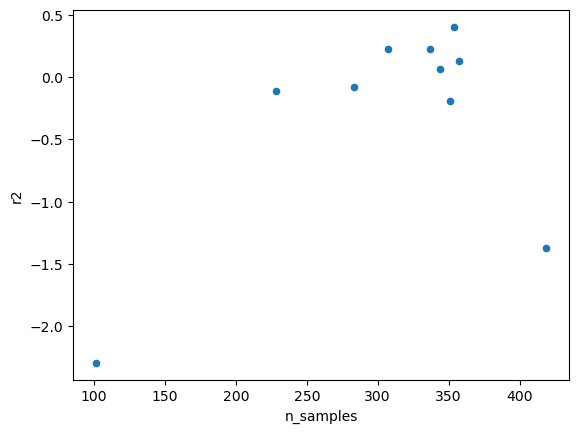

In [38]:
##Looping through sites
seed = 3

# pipe = Pipeline([
#     ('scaler', StandardScaler()),
#     ('forest', RandomForestRegressor(
#         n_estimators=200,
#         min_samples_split=5,
#         min_samples_leaf=4,
#         max_depth=10,
#         random_state=seed,
#         n_jobs=-1
#     ))
# ])

results = []
importances = []

feature_names = X.columns
sites=groups ##Added, from earlier

unique_sites = np.sort(sites.unique())

for site in unique_sites:

    # --- Split ---
    train_mask = sites != site
    test_mask  = sites == site

    X_train = X.loc[train_mask]
    y_train = y.loc[train_mask]

    X_test  = X.loc[test_mask]
    y_test  = y.loc[test_mask]

    # --- Fit ---
    pipe.fit(X_train, y_train)

    # --- Predict ---
    y_pred = pipe.predict(X_test)

    # --- Metrics ---
    r2   = metrics.r2_score(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    nrmse = rmse / np.ptp(y_test)

    results.append({
        'site': site,
        'n_samples': len(y_test),
        'r2': r2,
        'rmse': rmse,
        'nrmse': nrmse
    })

    # --- Feature importance ---
    rf = pipe.named_steps['forest']
    importances.append(rf.feature_importances_)
    
results_df = pd.DataFrame(results)
results_df.sort_values('r2')

importances_df = pd.DataFrame(
    importances,
    columns=feature_names,
    index=results_df['site']
)


importance_summary = pd.DataFrame({
    'mean_importance': importances_df.mean(),
    'std_importance': importances_df.std(),
    'cv_importance': importances_df.std() / importances_df.mean()
}).sort_values('mean_importance', ascending=False)


print(importance_summary.head(21))

results_df[['site', 'r2', 'rmse']].sort_values('r2')
results_df.plot.scatter('n_samples', 'r2')
y.groupby(sites).var()


,site,r2,rmse
3,4,0.226878,343.627254
2,3,0.066505,384.551186
0,1,-0.078232,452.304163
5,6,0.404010,468.203798
9,10,-1.374366,499.935263
8,9,-0.109588,499.998874
1,2,0.128412,556.788933
4,5,0.229346,637.114128
7,8,-2.295088,654.495541
6,7,-0.191926,979.176906


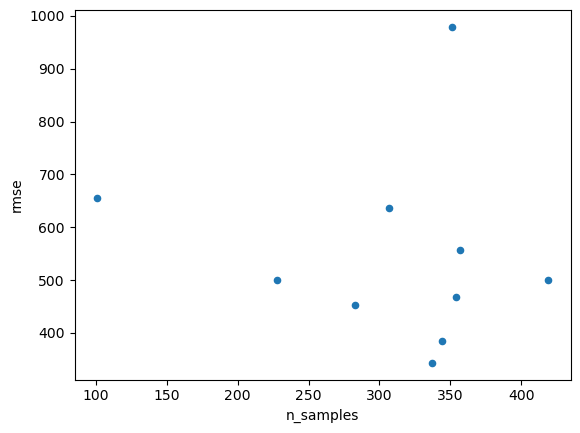

In [39]:
results_df.plot.scatter('n_samples', 'rmse')
results_df[['site', 'r2', 'rmse']].sort_values('rmse')

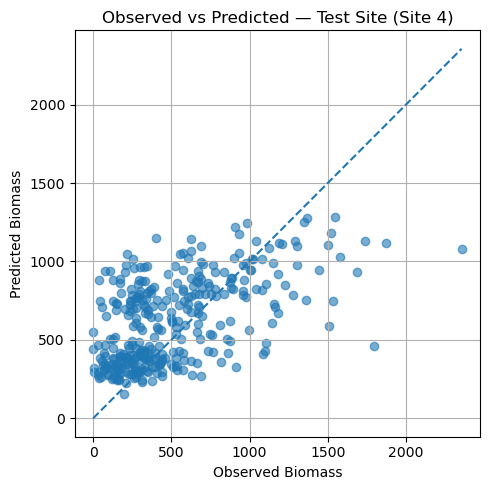

In [40]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 5))
plt.scatter(y_test_final, y_test_pred, alpha=0.6)
plt.plot(
    [y_test_final.min(), y_test_final.max()],
    [y_test_final.min(), y_test_final.max()],
    linestyle='--'
)

plt.xlabel("Observed Biomass")
plt.ylabel("Predicted Biomass")
plt.title("Observed vs Predicted — Test Site (Site 4)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [41]:
all_preds = []

for site in unique_sites:

    train_mask = sites != site
    test_mask  = sites == site

    X_train = X.loc[train_mask]
    y_train = y.loc[train_mask]
    X_test  = X.loc[test_mask]
    y_test  = y.loc[test_mask]

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    tmp = pd.DataFrame({
        'site': site,
        'observed': y_test.values,
        'predicted': y_pred
    })

    all_preds.append(tmp)

pred_df = pd.concat(all_preds, ignore_index=True)


C:\Users\arj26323\.conda\envs\geeml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arj26323\.conda\envs\geeml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arj26323\.conda\envs\geeml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arj26323\.conda\envs\geeml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

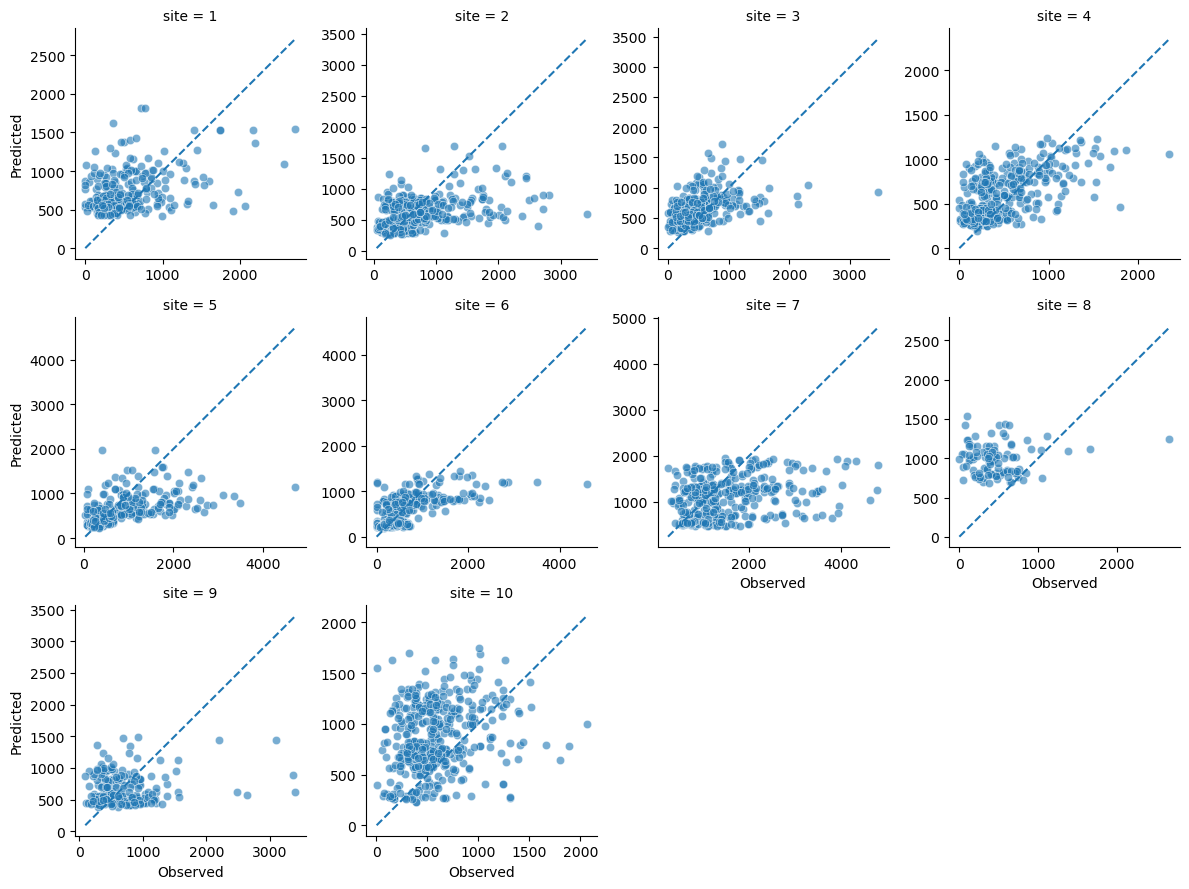

In [42]:
import seaborn as sns

g = sns.FacetGrid(pred_df, col="site", col_wrap=4, height=3, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x="observed", y="predicted", alpha=0.6)
g.map_dataframe(
    lambda data, **kws: plt.plot(
        [data.observed.min(), data.observed.max()],
        [data.observed.min(), data.observed.max()],
        linestyle='--'
    )
)

g.set_axis_labels("Observed", "Predicted")
g.tight_layout()
plt.show()


In [43]:
combined_r2 = metrics.r2_score(pred_df['observed'], pred_df['predicted'])
combined_rmse = np.sqrt(metrics.mean_squared_error(
    pred_df['observed'], pred_df['predicted']
))


print(combined_r2)
print(combined_rmse)

0.2102122427178965
570.5568932496403


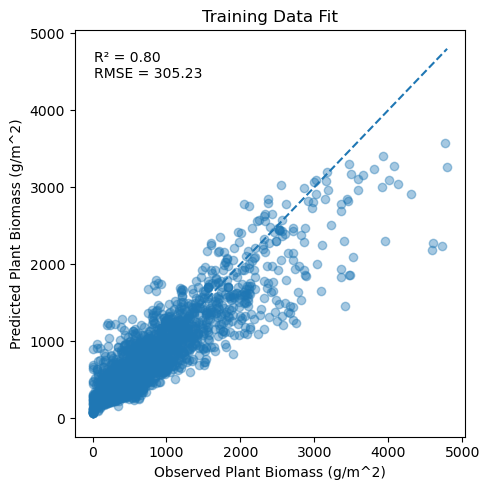

In [44]:
y_train_pred = pipe.predict(X_train)

from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_train, y_train_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

plt.figure(figsize=(5, 5))
plt.scatter(y_train, y_train_pred, alpha=0.4)
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    linestyle='--'
)

plt.text(
    0.05, 0.95,
    f'R² = {r2:.2f}\nRMSE = {rmse:.2f}',
    transform=plt.gca().transAxes,
    verticalalignment='top'
)

plt.xlabel('Observed Plant Biomass (g/m^2)')
plt.ylabel('Predicted Plant Biomass (g/m^2)')
plt.title('Training Data Fit')
plt.tight_layout()
plt.show()

In [45]:
corr = X.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

to_drop = [c for c in upper.columns if any(upper[c] > 0.9)]
X_reduced = X.drop(columns=to_drop)


X_reduced

,evi_max_05_10,slope,elevation,Percent_flooding,srad_peak,dayl_Max,nd_swir2_nir_mean_05_10,ndvi_mean_08_10,nd_r_g_max_05_10,spei14d
0,0.232282,0.693467,1.179146,0.014085,336.610535,50542.179688,-0.404771,0.608544,0.059350,0.119041
1,0.190468,0.693467,1.179146,0.014085,316.011963,50542.179688,-0.317078,0.502339,0.117821,0.104658
2,0.195634,0.693467,1.179146,0.014085,332.383911,50542.179688,-0.336010,0.548571,0.075218,-0.249589
3,0.178204,0.693467,1.179146,0.014085,330.674133,50542.179688,-0.277814,0.497044,0.065727,0.230000
4,0.191262,0.693467,1.179146,0.014085,334.421417,50542.179688,-0.281224,0.496204,0.076267,0.237534
...,...,...,...,...,...,...,...,...,...,...
3080,0.168836,0.308225,1.087664,0.011594,340.065857,50610.128906,-0.262571,0.539582,0.074512,0.224795
3081,0.132574,0.308225,1.087664,0.011594,327.975342,50610.128906,-0.203389,0.453920,0.056916,-0.282676
3082,0.200399,0.308225,1.087664,0.011594,311.941528,50610.128906,-0.307148,0.572171,0.047406,0.063571
3083,0.204570,0.308225,1.087664,0.011594,336.644226,50610.128906,-0.348148,0.566227,0.073944,0.069726


In [46]:
print(len(yargs))

##More work to do
# feature_importance_df

# ##Export csv dataframe
# out_dir = os.path.expanduser('C:/Users/arj26323/Documents/Data/Biomass datasets/Combined_GA_VA')
# out_csv = os.path.join(out_dir, 'ga_2025.csv')
# df0.to_csv(out_csv, index = False)

3081


<AxesSubplot:xlabel='evi_max_05_10', ylabel='Plant_Biomass'>

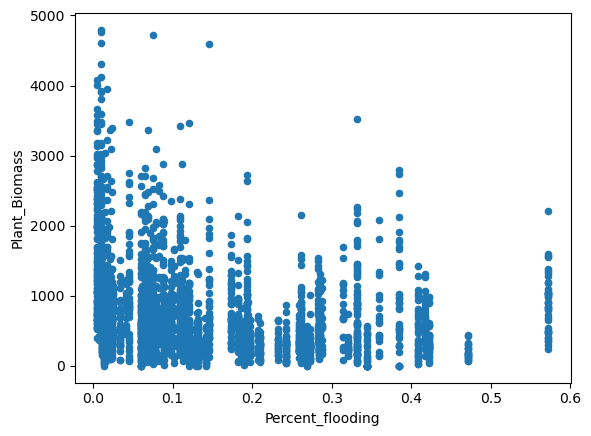

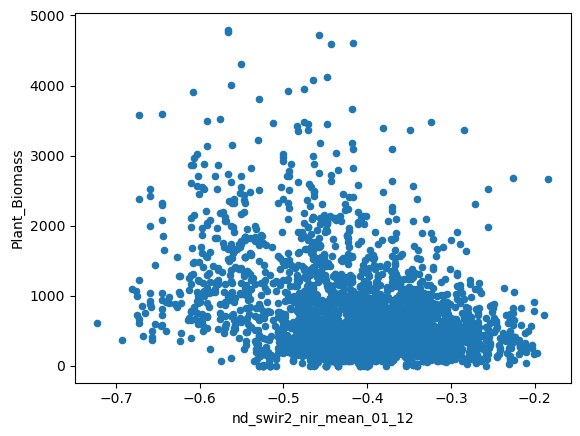

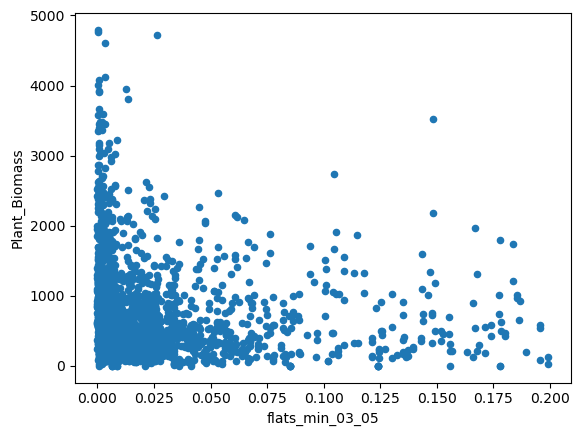

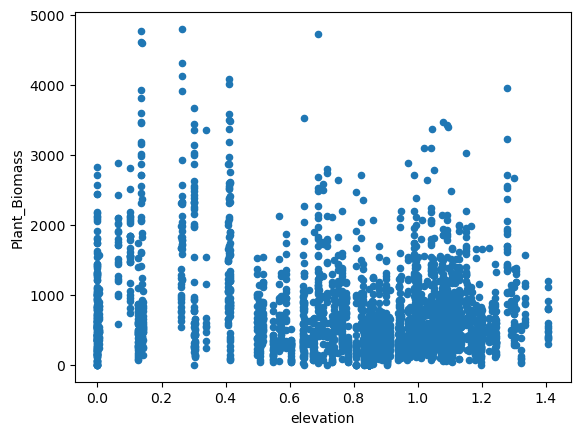

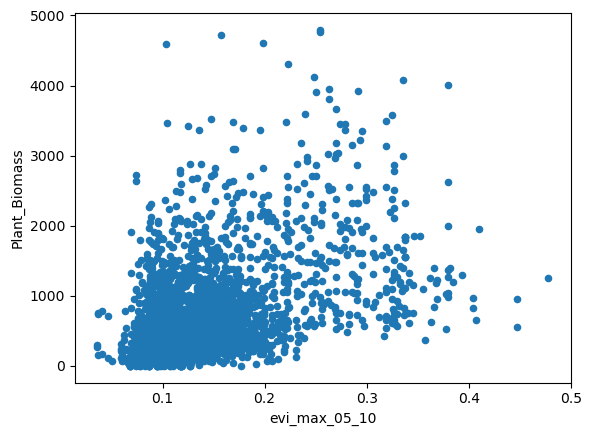

In [47]:
g = df0.plot(kind = 'scatter', x = 'Percent_flooding', y = 'Plant_Biomass')
g = df0.plot(kind = 'scatter', x = 'nd_swir2_nir_mean_01_12', y = 'Plant_Biomass')
g = df0.plot(kind = 'scatter', x = 'flats_min_03_05', y = 'Plant_Biomass')
g = df0.plot(kind = 'scatter', x = 'elevation', y = 'Plant_Biomass')
g = df0.plot(kind = 'scatter', x = 'evi_max_05_10', y = 'Plant_Biomass')

g

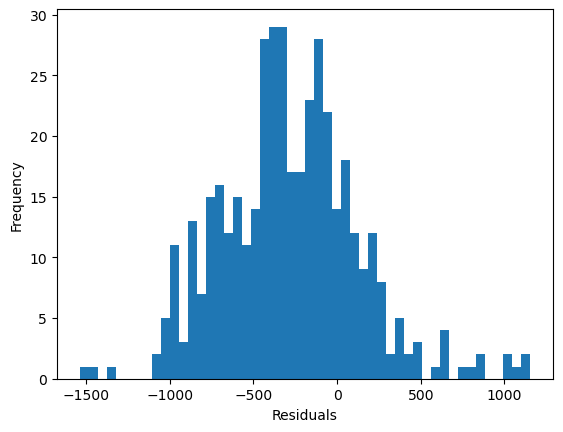

In [48]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.hist(residuals, bins=50)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# plt.scatter(yargs_test, y_pred)
# plt.xlabel("Actual Biomass")
# plt.ylabel("Predicted Biomass")
# plt.plot([min(yargs_test), max(yargs_test)], [min(yargs_test), max(yargs_test)], 'r--')
# plt.show()

In [49]:
import os
# os.chdir('C:\\Users\\arj26323\\Documents\\Data')
# os.getcwd()

# from joblib import dump

# # Save the whole pipeline (including preprocessing and model)
# dump(pipe, 'rf_pipeline.joblib')

In [ ]:
#Finito